In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 

In [2]:
data = pd.read_csv("./input/googleplaystore.csv")

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.columns = data.columns.str.replace(' ', '_') #change the column names

In [4]:
print(data.shape)
print(data.dtypes.value_counts())

(10841, 13)
object     12
float64     1
dtype: int64


In [5]:
data.Size.value_counts()  # in Size column

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [6]:
data.Size = data.Size.str.replace('k', 'e+3')
data.Size = data.Size.str.replace('M', 'e+6')

data.Size

0                     19e+6
1                     14e+6
2                    8.7e+6
3                     25e+6
4                    2.8e+6
                ...        
10836                 53e+6
10837                3.6e+6
10838                9.5e+6
10839    Varies with device
10840                 19e+6
Name: Size, Length: 10841, dtype: object

In [7]:
def is_convertable(v):
    try: 
        float(v)
        return True
    except ValueError:
        return False

In [8]:
temp = data.Size.apply(lambda x: is_convertable(x))
data.Size[~temp].value_counts() # showing results that is not convertable 

#replace these two to nan and numeric

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [9]:
data.Size = data.Size.replace('Varies with device', np.nan)
data.Size = data.Size.replace('1,000+', 1000)

In [10]:
data.Size = pd.to_numeric(data.Size)

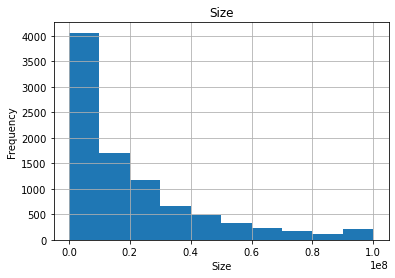

In [11]:
data.hist(column = 'Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

In [12]:
data.Installs.value_counts() 

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [13]:
data.Installs = data.Installs.apply(lambda x: x.strip('+'))
data.Installs = data.Installs.apply(lambda x: x.replace(',',''))
data.Installs = data.Installs.replace('Free', np.nan)
data.Installs.value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [14]:
data.Installs.str.isnumeric().sum()

10840

Text(0, 0.5, 'Frequency')

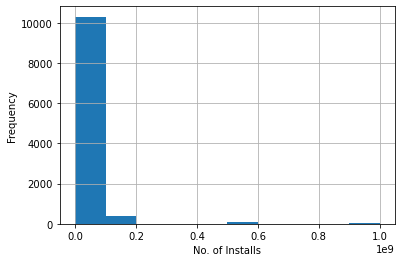

In [15]:
data.Installs = pd.to_numeric(data.Installs)
data.Installs.hist()
plt.xlabel('No. of Installs')
plt.ylabel('Frequency')

In [16]:
data.Reviews.str.isnumeric().sum() # one is not numeric

10840

In [17]:
data[~data.Reviews.str.isnumeric()] #not numeric one -> delete

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
data = data.drop(data.index[10472])

In [20]:
data[10471:].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000.0,100000.0,Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100000.0,10000000.0,Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14000000.0,1000.0,Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2600000.0,50000.0,Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7600000.0,50000.0,Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up


In [21]:
data.Reviews = data.Reviews.replace(data.Reviews[~data.Reviews.str.isnumeric()], np.nan)

ValueError: Series.replace cannot use dict-like to_replace and non-None value

Text(0, 0.5, 'Frequency')

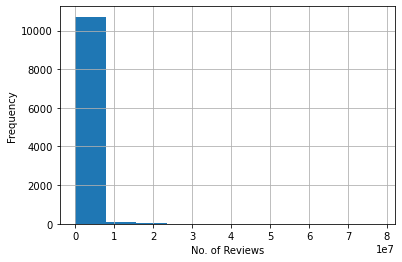

In [25]:
data.Reviews = pd.to_numeric(data.Reviews)
data.Reviews.hist()
plt.xlabel('No. of Reviews')
plt.ylabel('Frequency')

In [28]:
print("Range : ", data.Rating.min(), '~', data.Rating.max()) 
data.Rating.dtype # numeric 

Range :  1.0 ~ 5.0


dtype('float64')

In [27]:
print(data.Rating.isna().sum(), 'null values out of' , len(data.Rating))

1474 null values out of 10840


Text(0, 0.5, 'Frequency')

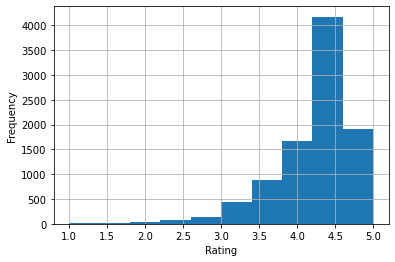

In [29]:
data.Rating.hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [30]:
data.Type.value_counts() # only two types

Free    10039
Paid      800
Name: Type, dtype: int64